#**Anshu Bagne**

In [ ]:
pip install opencv-python

# **Implement the SIFT algorithm to detect and match key points between two images.**


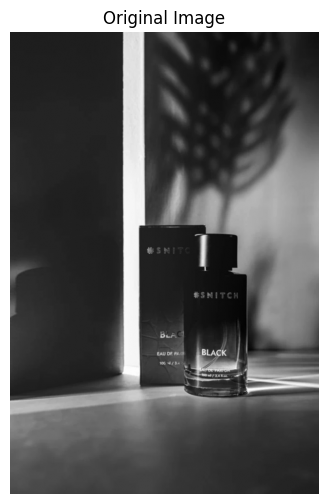

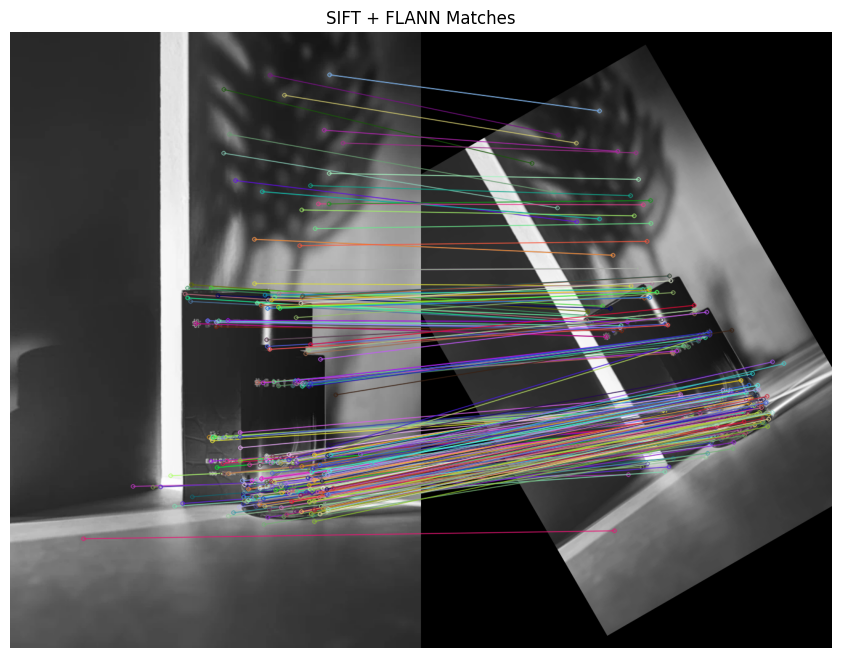

In [41]:
#Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original image in grayscale
img1 = cv2.imread("bottle.webp", cv2.IMREAD_GRAYSCALE)

#Show original image
plt.figure(figsize=(6, 6))
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

#Generate rotated and scaled version
rows, cols = img1.shape
angle = 30
scale = 0.8
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, scale)
img2 = cv2.warpAffine(img1, M, (cols, rows))

#Detect keypoints and compute descriptors using SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use FLANN for feature matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

#Apply Lowe's ratio test to find good matches
good_matches = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

#Draw the good matches
result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# result
plt.figure(figsize=(16, 8))
plt.imshow(result_img)
plt.title("SIFT + FLANN Matches")
plt.axis("off")
plt.show()


#**Implement the Harris corner detector to find and visualize corners in a grayscale image.**


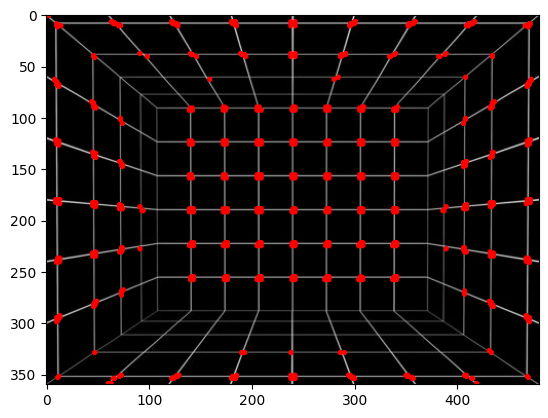

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("square_grid.jpg") #read the image by cv2.imread()

#covert image to BGR format to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_copy = np.copy(image_rgb)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.09)

dst = cv2.dilate(dst, None)
plt.imshow(gray, cmap='gray')


# Change the free parameter between o.1 to 0.6
thresh = 0.1*dst.max()
corner_image = np.copy(image_copy) # Create an image copy to draw corners on

for j in range(0, dst.shape[0]):
  for i in range(0, dst.shape[1]):
    if (dst[j,i] > thresh):
       #image, center pt, radius, color, thickness
       cv2.circle (corner_image, (i, j), 1, (255, 0, 0), -5)

plt.imshow(corner_image)

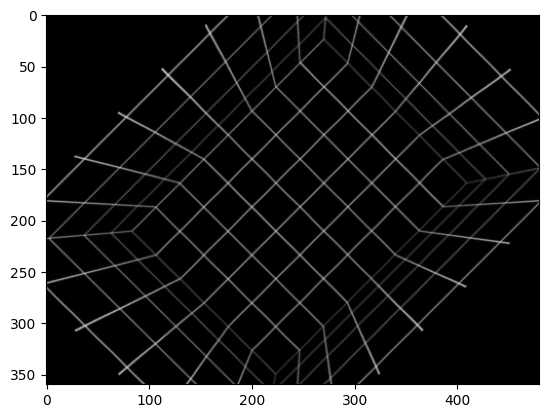

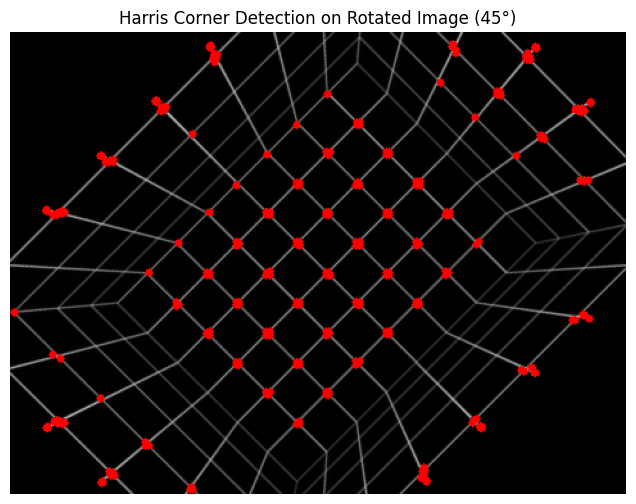

In [ ]:
# checking, if after rotation the cornors are detected or not.
image = cv2.imread("square_grid.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
(h, w) = image_rgb.shape[:2]
center = (w // 2, h // 2)
angle = 45  # angle
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (w, h))

plt.imshow(rotated_image)

gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_RGB2GRAY)
corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=5, k=0.1)
thresh = 0.1 * corners.max()

corner_image = np.copy(rotated_image)
for j in range(corners.shape[0]):
    for i in range(corners.shape[1]):
        if corners[j, i] > thresh:
            cv2.circle(corner_image, (i, j), 3, (255, 0, 0), -5)

plt.figure(figsize=(8, 6))
plt.imshow(corner_image)
plt.axis("off")
plt.title(f"Harris Corner Detection on Rotated Image ({angle}°)")
plt.show()




# **Use RANSAC to remove outlier key point matches and fit a transformation model between two images.**

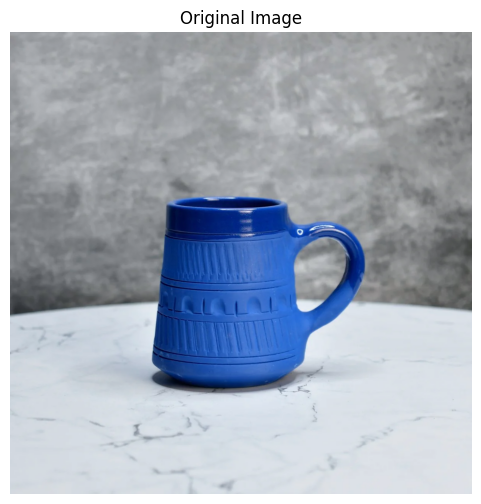

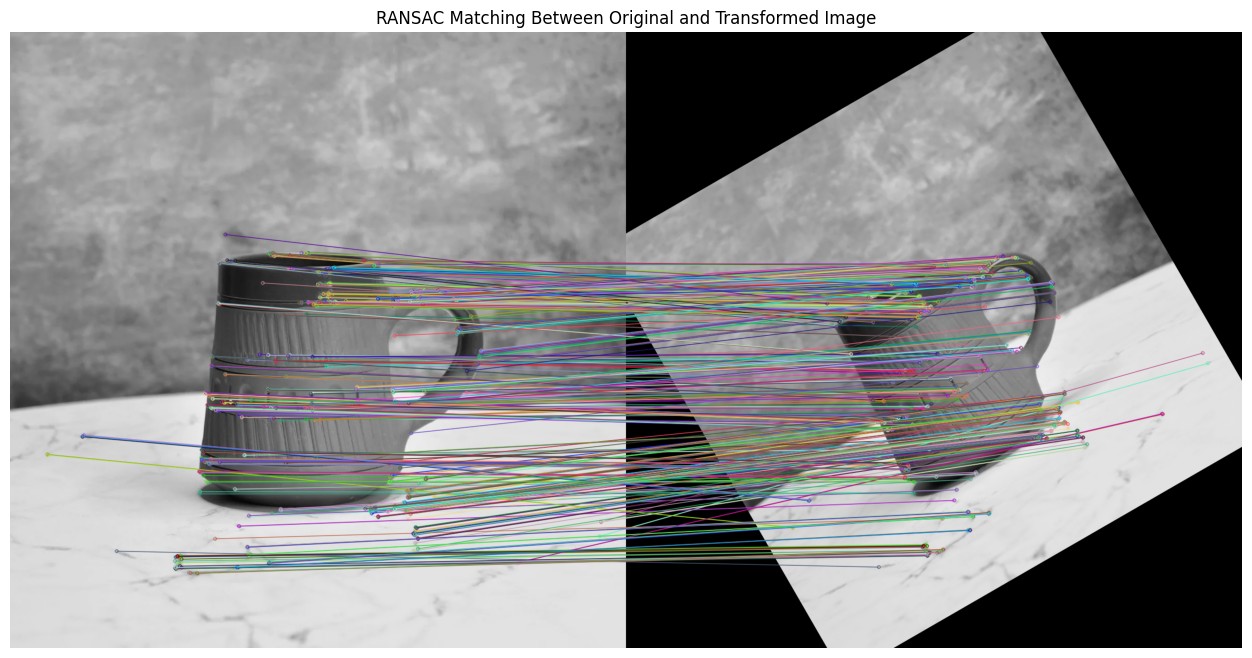

In [28]:
#Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load your image (change path as needed)
img1 = cv2.imread("mug.webp")
#Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img1)
plt.title("Original Image")
plt.axis("off")
plt.show()

img1 = cv2.imread("mug.webp", cv2.IMREAD_GRAYSCALE)

#Generate a transformed version (rotate + scale)
rows, cols = img1.shape
angle = 30               # degrees
scale = 0.8              # 80% scale
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, scale)
img2 = cv2.warpAffine(img1, M, (cols, rows))

# Detect keypoints and descriptors using ORB
orb = cv2.ORB_create(nfeatures=2000)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match descriptors using Brute Force + Hamming
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

#RANSAC- Estimate Homography & Mask inliers
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()

# Draw all good matches with inliers highlighted via mask
result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
  matchesMask=matches_mask, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#result
plt.figure(figsize=(16, 8))
plt.imshow(result_img)
plt.title("RANSAC Matching Between Original and Transformed Image")
plt.axis("off")
plt.show()
